In [1]:
import pandas as pd, numpy as np, datetime as dt

In [2]:
A = np.arange(100).reshape(-1,4)
L = np.vectorize(lambda x: x+3)


In [11]:
A, B = np.arange(100).reshape(-1,20),np.arange(100).reshape(20,-1)
A.dot(B), A.shape, B.shape,B.T.shape
(A+3).dot(B)

array([[15200, 15450, 15700, 15950, 16200],
       [34200, 34850, 35500, 36150, 36800],
       [53200, 54250, 55300, 56350, 57400],
       [72200, 73650, 75100, 76550, 78000],
       [91200, 93050, 94900, 96750, 98600]])

In [2]:
data = pd.read_csv('C:/Users/guess/Downloads/archive/data.csv', parse_dates=['date'])
pre_pro_data = pd.read_csv('C:/Users/guess/Downloads/archive/preprocessed_data.csv')
fighter_details = pd.read_csv('C:/Users/guess/Downloads/archive/raw_fighter_details.csv')
raw_total_fight_data = pd.read_csv('C:/Users/guess/Downloads/archive/raw_total_fight_data.csv')

In [3]:
data.head(30)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000000,0.000000,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500000,0.000000,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125000,0.000000,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0
5,Leonardo Santos,Grant Dawson,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,Lightweight,0.000000,0.000000,...,2,2,2,0,Orthodox,182.88,190.50,155.0,27.0,41.0
6,Song Kenan,Max Griffin,Keith Peterson,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,Welterweight,0.046875,0.125000,...,1,3,0,0,Orthodox,182.88,180.34,170.0,35.0,31.0
7,Derek Brunson,Kevin Holland,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.156250,0.000000,...,4,7,1,0,Southpaw,185.42,195.58,185.0,28.0,37.0
8,Montel Jackson,Jesse Strader,Keith Peterson,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,NaN,NaN,...,2,0,1,0,Southpaw,177.80,190.50,135.0,29.0,28.0
9,Bruno Silva,JP Buys,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Flyweight,NaN,NaN,...,0,0,0,0,NaN,182.88,NaN,185.0,24.0,31.0


In [20]:
(data
 .assign(fighters = data.apply(lambda x: [x.R_fighter, x.B_fighter], axis = 1))
 .groupby(['R_fighter'])

)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,fighters
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0,"[Adrian Yanez, Gustavo Lopez]"
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0,"[Trevin Giles, Roman Dolidze]"
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0,"[Tai Tuivasa, Harry Hunsucker]"
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0,"[Cheyanne Buys, Montserrat Conejo]"
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0,"[Marion Reneau, Macy Chiasson]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,Southpaw,190.50,NaN,260.0,NaN,NaN,"[Remco Pardoel, Alberta Cerra Leon]"
6008,Orlando Wiet,Robert Lucarelli,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,Southpaw,177.80,NaN,170.0,NaN,NaN,"[Orlando Wiet, Robert Lucarelli]"
6009,Johnny Rhodes,David Levicki,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,Orthodox,182.88,NaN,210.0,NaN,NaN,"[Johnny Rhodes, David Levicki]"
6010,Patrick Smith,Ray Wizard,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,Orthodox,187.96,NaN,225.0,NaN,30.0,"[Patrick Smith, Ray Wizard]"


In [4]:
#Getting the name of the winner.
data['Winner_name'] = data.apply(lambda x: x['R_fighter'] if x['Winner']=='Red' else x['B_fighter'], axis = 1 )

In [5]:

(data
 .assign(Winner_name_1 = data.apply(lambda x: x.R_fighter if x.Winner=='Red' else x.B_fighter, axis = 1 ))
)


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner_name_1
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0,Adrian Yanez
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0,Trevin Giles
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0,Tai Tuivasa
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0,Montserrat Conejo
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0,Macy Chiasson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,Southpaw,190.50,NaN,260.0,NaN,NaN,Remco Pardoel
6008,Orlando Wiet,Robert Lucarelli,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,Southpaw,177.80,NaN,170.0,NaN,NaN,Orlando Wiet
6009,Johnny Rhodes,David Levicki,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,Orthodox,182.88,NaN,210.0,NaN,NaN,Johnny Rhodes
6010,Patrick Smith,Ray Wizard,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,Orthodox,187.96,NaN,225.0,NaN,30.0,Patrick Smith


In [11]:
data.memory_usage().sum()

6931964

In [8]:
data.dtypes.to_dict()

{'R_fighter': dtype('O'),
 'B_fighter': dtype('O'),
 'Referee': dtype('O'),
 'date': dtype('<M8[ns]'),
 'location': dtype('O'),
 'Winner': dtype('O'),
 'title_bout': dtype('bool'),
 'weight_class': dtype('O'),
 'B_avg_KD': dtype('float64'),
 'B_avg_opp_KD': dtype('float64'),
 'B_avg_SIG_STR_pct': dtype('float64'),
 'B_avg_opp_SIG_STR_pct': dtype('float64'),
 'B_avg_TD_pct': dtype('float64'),
 'B_avg_opp_TD_pct': dtype('float64'),
 'B_avg_SUB_ATT': dtype('float64'),
 'B_avg_opp_SUB_ATT': dtype('float64'),
 'B_avg_REV': dtype('float64'),
 'B_avg_opp_REV': dtype('float64'),
 'B_avg_SIG_STR_att': dtype('float64'),
 'B_avg_SIG_STR_landed': dtype('float64'),
 'B_avg_opp_SIG_STR_att': dtype('float64'),
 'B_avg_opp_SIG_STR_landed': dtype('float64'),
 'B_avg_TOTAL_STR_att': dtype('float64'),
 'B_avg_TOTAL_STR_landed': dtype('float64'),
 'B_avg_opp_TOTAL_STR_att': dtype('float64'),
 'B_avg_opp_TOTAL_STR_landed': dtype('float64'),
 'B_avg_TD_att': dtype('float64'),
 'B_avg_TD_landed': dtype('floa

In [10]:
col_ = ['R_fighter',
 'B_fighter',
 'Referee',
 'date',
 'location',
 'Winner',
 'title_bout',
 'weight_class',
'B_wins',
'B_losses',
'R_wins',
'R_losses',
'R_age',
'B_age']
clean_data = data.copy()
clean_data = clean_data[col_]

In [19]:
clean_data = (clean_data
             .assign(Winner_Name = clean_data.apply(lambda x: x.R_fighter if x.Winner == 'Red' else x.B_fighter, axis = 1)
                    ,R_Winning_record = clean_data.apply(lambda x: x.R_wins >= x.R_losses, axis = 1)
                    ,B_Winning_record = clean_data.apply(lambda x: x.B_wins >= x.B_losses, axis = 1)
                     ,B_age = clean_data.B_age.fillna(0)
                    ,R_age = clean_data.R_age.fillna(0))
             .astype({'B_wins':'int8'
                      ,'R_wins': 'int8'
                      ,'weight_class':'category'
                      ,'Referee': 'category'
                      ,'R_age':'int8'
                      ,'B_age':'int8'}
                    )
            )

In [21]:
clean_data

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_wins,B_losses,R_wins,R_losses,R_age,B_age,Winner_Name,R_Winning_record,B_Winning_record
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,1,1,1,0,27,31,Adrian Yanez,True,True
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,2,0,4,2,28,32,Trevin Giles,True,True
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,0,0,4,3,28,32,Tai Tuivasa,True,True
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,0,0,0,0,25,28,Montserrat Conejo,True,True
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,4,1,5,6,43,29,Macy Chiasson,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,0,0,0,0,0,0,Remco Pardoel,True,True
6008,Orlando Wiet,Robert Lucarelli,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,0,0,0,0,0,0,Orlando Wiet,True,True
6009,Johnny Rhodes,David Levicki,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,0,0,0,0,0,0,Johnny Rhodes,True,True
6010,Patrick Smith,Ray Wizard,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,0,0,0,0,30,0,Patrick Smith,True,True


<AxesSubplot:xlabel='Referee,weight_class'>

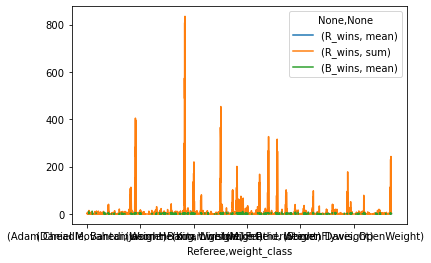

In [30]:
import matplotlib.pyplot as plt
(clean_data
 .groupby(['Referee', 'weight_class'])
 .agg({'R_wins': ['mean', 'sum']
      ,'B_wins': 'mean'})
 .plot()
)


In [33]:
(clean_data
 .groupby(['Referee', 'weight_class'])
 .agg({'R_wins': ['mean', 'sum']
      ,'B_wins': 'mean'})
 .unstack()
).R_wins

mean                                                  \
weight_class   Bantamweight CatchWeight Featherweight Flyweight Heavyweight   
Referee                                                                       
Adam Cheadle         3.0000         NaN           NaN      1.00         NaN   
Adam Martinez        1.0000         NaN      7.000000      1.00    5.000000   
Al Coley                NaN         NaN           NaN       NaN         NaN   
Al Guinee            5.0000         NaN           NaN       NaN    0.666667   
Al Wichgers             NaN         NaN           NaN       NaN    0.000000   
...                     ...         ...           ...       ...         ...   
Wayne Spinola        3.0000         NaN      6.000000       NaN         NaN   
Wernei Cardoso          NaN         NaN      2.000000      1.00    0.000000   
Will Fisher             NaN         NaN      1.000000       NaN         NaN   
Wolf Menninger       1.0000         NaN      1.000000       NaN         NaN   
Yves Lavigne         2.6875         3.0      4.071429      8.75    2.894737   

                                                                     \
weight_class   LightHeavyweight Lightweight Middleweight OpenWeight   
Referee                                                               
Adam Cheadle                NaN    4.000000          NaN        NaN   
Adam Martinez          3.000000    2.000000     2.000000        NaN   
Al Coley                    NaN         NaN          NaN        NaN   
Al Guinee                   NaN    1.000000     6.000000        NaN   
Al Wichgers                 NaN         NaN     2.000000        NaN   
...                         ...         ...          ...        ...   
Wayne Spinola               NaN         NaN          NaN        NaN   
Wernei Cardoso              NaN    0.500000          NaN        NaN   
Will Fisher                 NaN         NaN          NaN        NaN   
Wolf Menninger              NaN         NaN     1.000000        NaN   
Yves Lavigne           5.032258    3.915254     3.621622        NaN   

                             ...         sum                               \
weight_class   Welterweight  ... Heavyweight LightHeavyweight Lightweight   
Referee                      ...                                            
Adam Cheadle            NaN  ...         0.0              0.0         8.0   
Adam Martinez      0.500000  ...        15.0              9.0         2.0   
Al Coley           2.500000  ...         0.0              0.0         0.0   
Al Guinee               NaN  ...         2.0              0.0         2.0   
Al Wichgers             NaN  ...         0.0              0.0         0.0   
...                     ...  ...         ...              ...         ...   
Wayne Spinola           NaN  ...         0.0              0.0         0.0   
Wernei Cardoso     1.750000  ...         0.0              0.0         1.0   
Will Fisher             NaN  ...         0.0              0.0         0.0   
Wolf Menninger     1.000000  ...         0.0              0.0         0.0   
Yves Lavigne       4.673077  ...        55.0            156.0       231.0   

                                                                       \
weight_class   Middleweight OpenWeight Welterweight WomenBantamweight   
Referee                                                                 
Adam Cheadle            0.0        0.0          0.0               0.0   
Adam Martinez           4.0        0.0          1.0               0.0   
Al Coley                0.0        0.0          5.0               0.0   
Al Guinee               6.0        0.0          0.0               0.0   
Al Wichgers             2.0        0.0          0.0               0.0   
...                     ...        ...          ...               ...   
Wayne Spinola           0.0        0.0          0.0               0.0   
Wernei Cardoso          0.0        0.0          7.0               0.0   
Will Fisher             0.0        0.0 

In [18]:
class Rogan:
    def __init__(self, guest:str = 'Hello'):
        self.guest = guest
    def get_name(self):
        return self.guest
    def lower(self):
        return 2
class Brian(Rogan):
    def __init__(self,temp):
        super().__init__('Brian')
        self.temp = temp

b =  Brian('Hwllo')
b.temp

'Hwllo'

In [33]:
data = (data
 .assign(R_fighter = data.R_fighter.str.lower(),
        B_fighter = data.B_fighter.str.lower(),
        Referee = data.Referee.str.lower(),
        location = data.location.str.lower(),
        Winner_name = data.Winner_name.str.lower())
 .astype({'R_fighter': 'category',
          'B_fighter': 'category',
          'Referee': 'category',
          'location': 'category',
          'Winner_name': 'category'
         })
)
data.dtypes

R_fighter             category
B_fighter             category
Referee               category
date            datetime64[ns]
location              category
                     ...      
R_Reach_cms            float64
R_Weight_lbs           float64
B_age                  float64
R_age                  float64
Winner_name           category
Length: 145, dtype: object

In [35]:
data.Winner_name.value_counts()

donald cerrone       23
demian maia          22
jon jones            21
jim miller           21
georges st-pierre    20
                     ..
miranda maverick      1
miranda granger       1
milton vieira         1
milana dudieva        1
junior albini         1
Name: Winner_name, Length: 1463, dtype: int64

In [57]:
(data
 .groupby(['weight_class', 'title_bout'])
 .agg(["count"])
)

R_fighter B_fighter Referee  date location  \
                                  count     count   count count    count   
weight_class       title_bout                                              
Bantamweight       False            453       453     447   453      453   
                   True              22        22      22    22       22   
CatchWeight        False             44        44      44    44       44   
                   True              10        10      10    10       10   
Featherweight      False            529       529     527   529      529   
                   True              22        22      22    22       22   
Flyweight          False            213       213     212   213      213   
                   True              17        17      17    17       17   
Heavyweight        False            531       531     528   531      531   
                   True              54        54      54    54       54   
LightHeavyweight   False            520       520     520   520      520   
                   True              53        53      53    53       53   
Lightweight        False           1047      1047    1035  1047     1047   
                   True              44        44      44    44       44   
Middleweight       False            769       769     767   769      769   
                   True              44        44      44    44       44   
OpenWeight         False             86        86      86    86       86   
Welterweight       False           1026      1026    1025  1026     1026   
                   True              57        57      57    57       57   
WomenBantamweight  False            136       136     134   136      136   
                   True              15        15      15    15       15   
WomenFeatherweight False              8         8       8     8        8   
                   True               8         8       8     8        8   
WomenFlyweight     False            106       106     103   106      106   
                   True               6         6       6     6        6   
WomenStrawweight   False            179       179     179   179      179   
                   True              13        13      13    13       13   

                              Winner B_avg_KD B_avg_opp_KD B_avg_SIG_STR_pct  \
                               count    count        count             count   
weight_class       title_bout                                                  
Bantamweight       False         453      338          338               338   
                   True           22       17           17                17   
CatchWeight        False          44       33           33                33   
                   True           10       10           10                10   
Featherweight      False         529      414          414               414   
                   True           22       17           17                17   
Flyweight          False         213      161          161               161   
                   True           17       17           17                17   
Heavyweight        False         531      380          380               380   
                   True           54       48           48                48   
LightHeavyweight   False         520      408          408               408   
                   True           53       45           45                45   
Lightweight        False        1047      798          798               798   
                   True           44       30           30                30   
Middleweight       False         769      605          605               605   
                   True           44       34           34                34   
OpenWeight         False          86       33           33                33   
Welterweight       False        1026      808          808               808   
                   True           57       41           41           

In [55]:
(data
 .query("Referee == 'herb dean'")
)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner_name
1,trevin giles,roman dolidze,herb dean,2021-03-20,"las vegas, nevada, usa",Red,False,Middleweight,0.500000,0.000000,...,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0,trevin giles
2,tai tuivasa,harry hunsucker,herb dean,2021-03-20,"las vegas, nevada, usa",Red,False,Heavyweight,NaN,NaN,...,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0,tai tuivasa
7,derek brunson,kevin holland,herb dean,2021-03-20,"las vegas, nevada, usa",Red,False,Middleweight,0.156250,0.000000,...,7,1,0,Southpaw,185.42,195.58,185.0,28.0,37.0,derek brunson
12,leon edwards,belal muhammad,herb dean,2021-03-13,"las vegas, nevada, usa",Draw,False,Welterweight,0.000000,0.064941,...,2,1,0,Southpaw,187.96,187.96,170.0,32.0,29.0,belal muhammad
14,eryk anders,darren stewart,herb dean,2021-03-13,"las vegas, nevada, usa",Draw,False,Middleweight,0.023438,0.000000,...,3,0,0,Southpaw,185.42,190.50,185.0,30.0,33.0,darren stewart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5606,chris lytle,ronald jhun,herb dean,2004-08-21,"las vegas, nevada, usa",Red,False,Welterweight,NaN,NaN,...,0,1,0,Orthodox,180.34,172.72,170.0,33.0,30.0,chris lytle
5611,trevor prangley,curtis stout,herb dean,2004-06-19,"las vegas, nevada, usa",Red,False,Middleweight,0.000000,0.000000,...,0,0,0,Orthodox,185.42,190.50,185.0,30.0,31.0,trevor prangley
5613,frank mir,tim sylvia,herb dean,2004-06-19,"las vegas, nevada, usa",Red,True,Heavyweight,0.750000,0.000000,...,1,3,0,Southpaw,190.50,200.66,264.0,28.0,25.0,frank mir
5619,yves edwards,hermes franca,herb dean,2004-04-02,"las vegas, nevada, usa",Red,False,Lightweight,1.000000,0.000000,...,2,1,0,Southpaw,175.26,185.42,155.0,29.0,27.0,yves edwards


In [34]:
data.loc[(data['R_fighter'].apply(lambda x: 'Bisping' in x)) | (data['B_fighter'].apply(lambda x: 'Bisping' in x)), ['weight_class']].value_counts()

weight_class    
Middleweight        24
LightHeavyweight     5
dtype: int64

In [7]:
class Doggie:
    def __init__(self, breed, color):
        self.breed = breed
        self.color = color
        
    def __get__(self):
        return self.color.lower()=='black', self.breed

class Poodle(Doggie):
    def __init__(self, color):
        self.color = color
        super().__init__('Poodle',self.color )
P = Poodle('Red')
P.__get__()
P.breed

'Poodle'

In [16]:
T = map(lambda x: x==2, [2,3])
T.__next__()
T.__next__()
T.__next__()

StopIteration: 

In [1]:
data.weight_class.sample()

NameError: name 'data' is not defined

In [17]:
isinstance(True, int)

True

In [49]:
def app(a,L = None):
    if L is None:
        L = []
        L.append(a)
    return L
    
T = tuple([1,2,3,4])
a,b,c,d = T
b

2

In [56]:
L = list(range(10))
L.extend([27,34])
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 27, 34]

In [62]:
list(range(0,13, 3))

[0, 3, 6, 9, 12]

In [63]:
L.index

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [93]:
def splitter(L,parts):
    if not len(L)%parts:
        S = []
        i = 0
        K = int(len(L)/parts)
        while i<len(L):
            
            S.append(L[i:i+K])
            i += K
    return S,K,i
      

In [97]:
L = [2,3,4,5,6,4,10,11,12,13,14,15]
splitter(L,6)

([[2, 3], [4, 5], [6, 4], [10, 11], [12, 13], [14, 15]], 2, 12)

In [3]:
class restaurant():
    def __init__(self, name, menu:str = 'The empty one'):
        self.name = name
        self.menu = menu
    def get_name(self):
        return self.name
    def get_menu(self):
        return self.menu
class popeyes(restaurant):
    def __init__(self, name, menu):
        super().__init__(name, menu)
        
pop = popeyes('popeyes of AUG', 'h')
pop.get_name(), pop.get_menu()

('popeyes of AUG', 'h')